In [1]:
import dopo

In [2]:
import brightway2 as bw
import bw2data as bd
import bw2analyzer as ba

In [3]:
bd.projects.set_current("premise-validation-try1")
bw.bw2setup()

bio3=bw.Database('biosphere3')
ei39=bw.Database('ecoinvent 3.9.1 cutoff')
ei39SSP2=bw.Database('ei_cutoff_3.9_image_SSP2-RCP19_2050 2024-06-27')

Biosphere database already present!!! No setup is needed


In [4]:
bw.databases?

Type:        Databases
String form:
Databases dictionary with 4 object(s):
	biosphere3
	ecoinvent 3.8 cutoff
	ecoinvent 3.9.1 cutoff
	ei_cutoff_3.9_image_SSP2-RCP19_2050 2024-06-27
Length:      4
File:        c:\users\fried\miniconda3\envs\premise\lib\site-packages\bw2data\meta.py
Docstring:   A dictionary for database metadata. This class includes methods to manage database versions. File data is saved in ``databases.json``.

In [5]:
len(ei39)

21238

In [6]:
len(ei39SSP2)

25049

In [7]:
ei39SSP2.random()

'carbon dioxide storage from hard coal, oxy, pipeline 400km, storage 3000m' (kilogram, RSAF, None)

In [8]:
fp_yaml='cement_concrete.yaml'
material_sectors=dopo.generate_sets_from_filters(fp_yaml, database=ei39)

In [9]:
material_sectors

{'Cement': {'cement production, CP II-F' (kilogram, BR, None),
  'cement production, CEM V/A' (kilogram, Europe without Switzerland, None),
  'cement production, type S' (kilogram, US, None),
  'cement production, Portland' (kilogram, Europe without Switzerland, None),
  'cement production, CEM II/A-V' (kilogram, ZA, None),
  'cement production, CEM II/B-S' (kilogram, ZA, None),
  'cement production, CEM III/A' (kilogram, CH, None),
  'cement production, CP V RS' (kilogram, BR, None),
  'cement production, Portland' (kilogram, US, None),
  'cement production, CEM IV/B' (kilogram, RoW, None),
  'cement production, Portland' (kilogram, PE, None),
  'cement production, Portland Slag' (kilogram, IN, None),
  'cement production, CP II-Z' (kilogram, BR, None),
  'cement production, CEM III/A' (kilogram, RoW, None),
  'cement production, CEM V/A' (kilogram, CH, None),
  'cement production, CEM V/B' (kilogram, CH, None),
  'cement production, CEM III/B' (kilogram, RoW, None),
  'cement product

In [10]:
small_cement=[x for x in material_sectors['Cement'] if 'Portland' in x['name'] and 'Slag' not in x['name'] and 'Pozzolana' not in x['name'] and 'Europe without Switzerland' not in x['location'] and 'RoW' not in x['location']]

In [11]:
small_cement=small_cement[:]

In [12]:
type(small_cement)

list

In [13]:
finder=dopo.MethodFinder() #why does the error "missing one argument 'self' doesn't come up if I define the class in a variable? Is it because it is created as an object?

In [14]:
finder.find_and_create_method(criteria=['IPCC', '2013', 'GWP100'], exclude=['no LT'])

{'method_1': {'object': Brightway2 Method: IPCC 2013: climate change: global warming potential (GWP100),
  'method name': ('IPCC 2013',
   'climate change',
   'global warming potential (GWP100)'),
  'short name': 'global warming potential (GWP100)',
  'unit': 'kg CO2-Eq'}}

In [15]:
finder.find_and_create_method(criteria=['EN15804','Cumulative', 'non-renewable' ])

{'method_2': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: Cumulative Energy Demand - non-renewable energy resources,
  'method name': ('EN15804',
   'inventory indicators ISO21930',
   'Cumulative Energy Demand - non-renewable energy resources'),
  'short name': 'Cumulative Energy Demand - non-renewable energy resources',
  'unit': 'megajoule'}}

In [16]:
finder.find_and_create_method(criteria=['land occupation','selected'])

{'method_3': {'object': Brightway2 Method: selected LCI results: resource: land occupation,
  'method name': ('selected LCI results', 'resource', 'land occupation'),
  'short name': 'land occupation',
  'unit': 'square meter-year'}}

In [17]:
finder.find_and_create_method(criteria=['EN15804','fresh water'])

{'method_4': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: use of net fresh water,
  'method name': ('EN15804',
   'inventory indicators ISO21930',
   'use of net fresh water'),
  'short name': 'use of net fresh water',
  'unit': 'cubic meter'}}

In [18]:
method_dict=finder.get_all_methods()
method_dict

{'method_1': {'object': Brightway2 Method: IPCC 2013: climate change: global warming potential (GWP100),
  'method name': ('IPCC 2013',
   'climate change',
   'global warming potential (GWP100)'),
  'short name': 'global warming potential (GWP100)',
  'unit': 'kg CO2-Eq'},
 'method_2': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: Cumulative Energy Demand - non-renewable energy resources,
  'method name': ('EN15804',
   'inventory indicators ISO21930',
   'Cumulative Energy Demand - non-renewable energy resources'),
  'short name': 'Cumulative Energy Demand - non-renewable energy resources',
  'unit': 'megajoule'},
 'method_3': {'object': Brightway2 Method: selected LCI results: resource: land occupation,
  'method name': ('selected LCI results', 'resource', 'land occupation'),
  'short name': 'land occupation',
  'unit': 'square meter-year'},
 'method_4': {'object': Brightway2 Method: EN15804: inventory indicators ISO21930: use of net fresh water,
  'method na

In [19]:
method_dict['method_1']['object'].name #checking

('IPCC 2013', 'climate change', 'global warming potential (GWP100)')

In [20]:
cement_sector_LCAs=dopo.compare_activities_multiple_methods(
    activities_list=small_cement, 
    methods=method_dict,  
    identifier='cement',
    output_format='pandas',
    mode='absolute')

Omitting activity name common prefix: 'cement production, '
Omitting activity name common prefix: 'cement production, '
Omitting activity name common prefix: 'cement production, '
Omitting activity name common prefix: 'cement production, '


In [21]:
cement_sector_LCAs_w_other=dopo.small_inputs_to_other_column(cement_sector_LCAs, cutoff = 0.02)

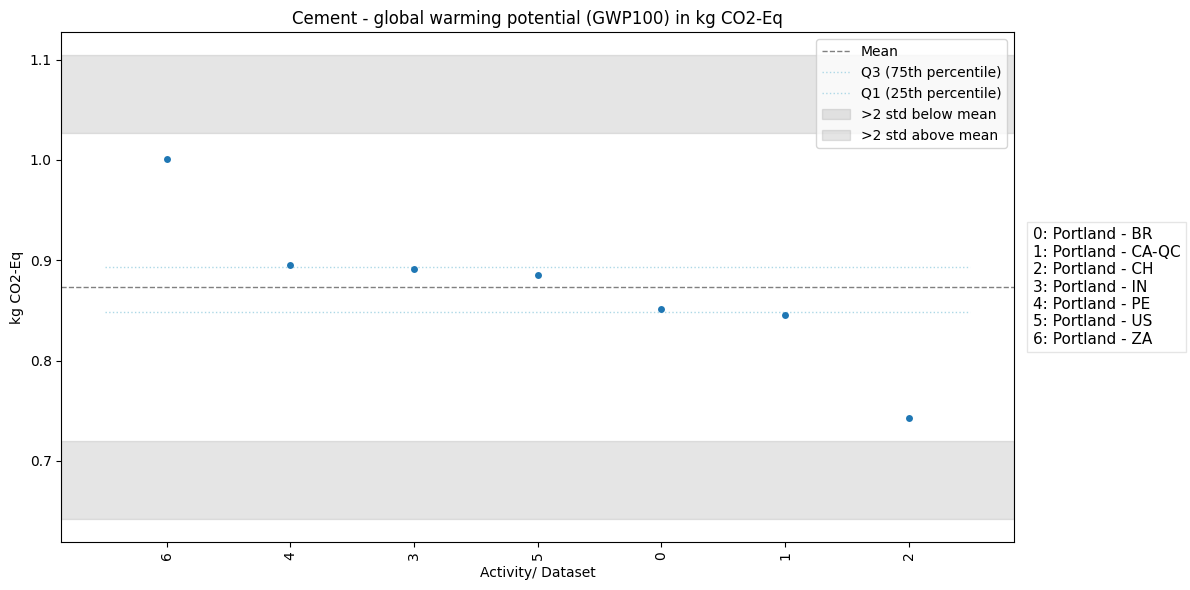

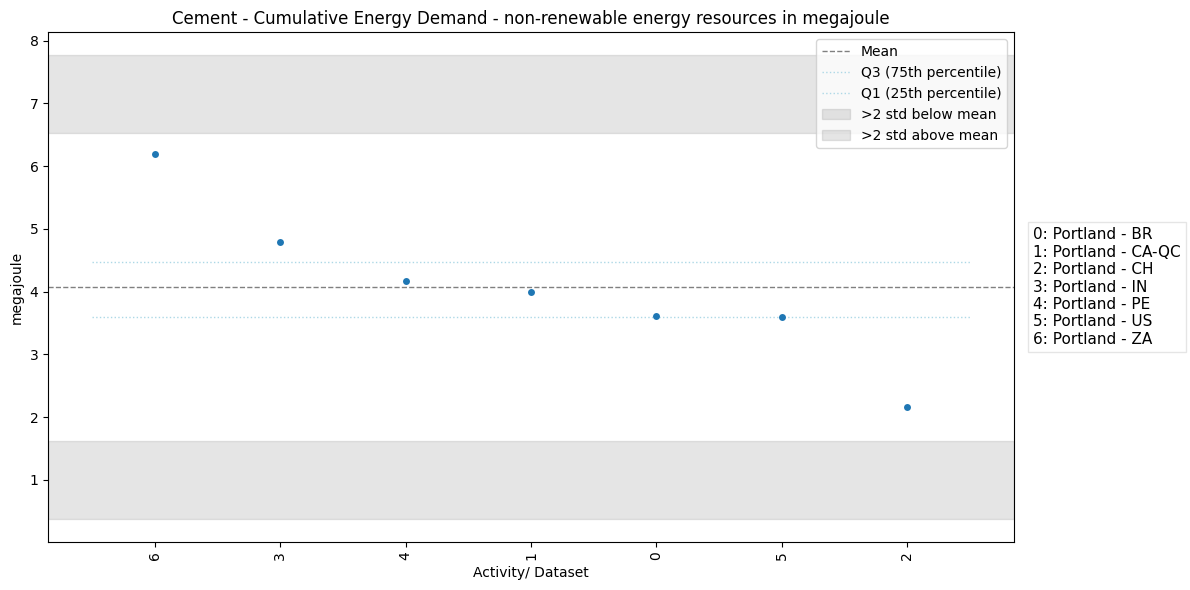

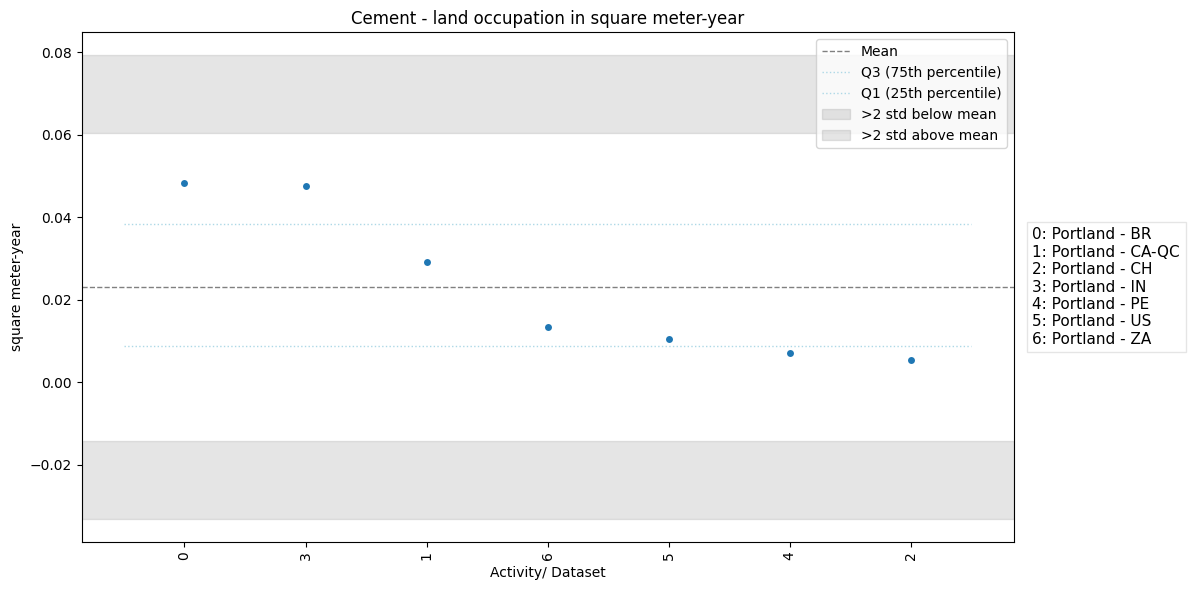

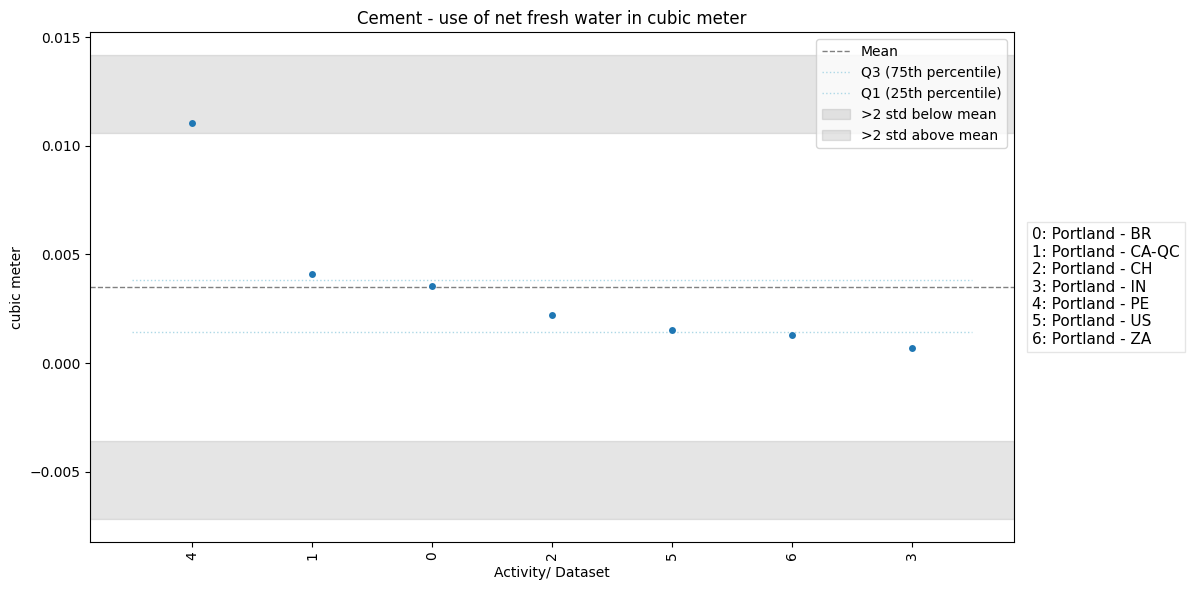

In [22]:
dopo.lvl1_plot(cement_sector_LCAs_w_other, 'Cement')

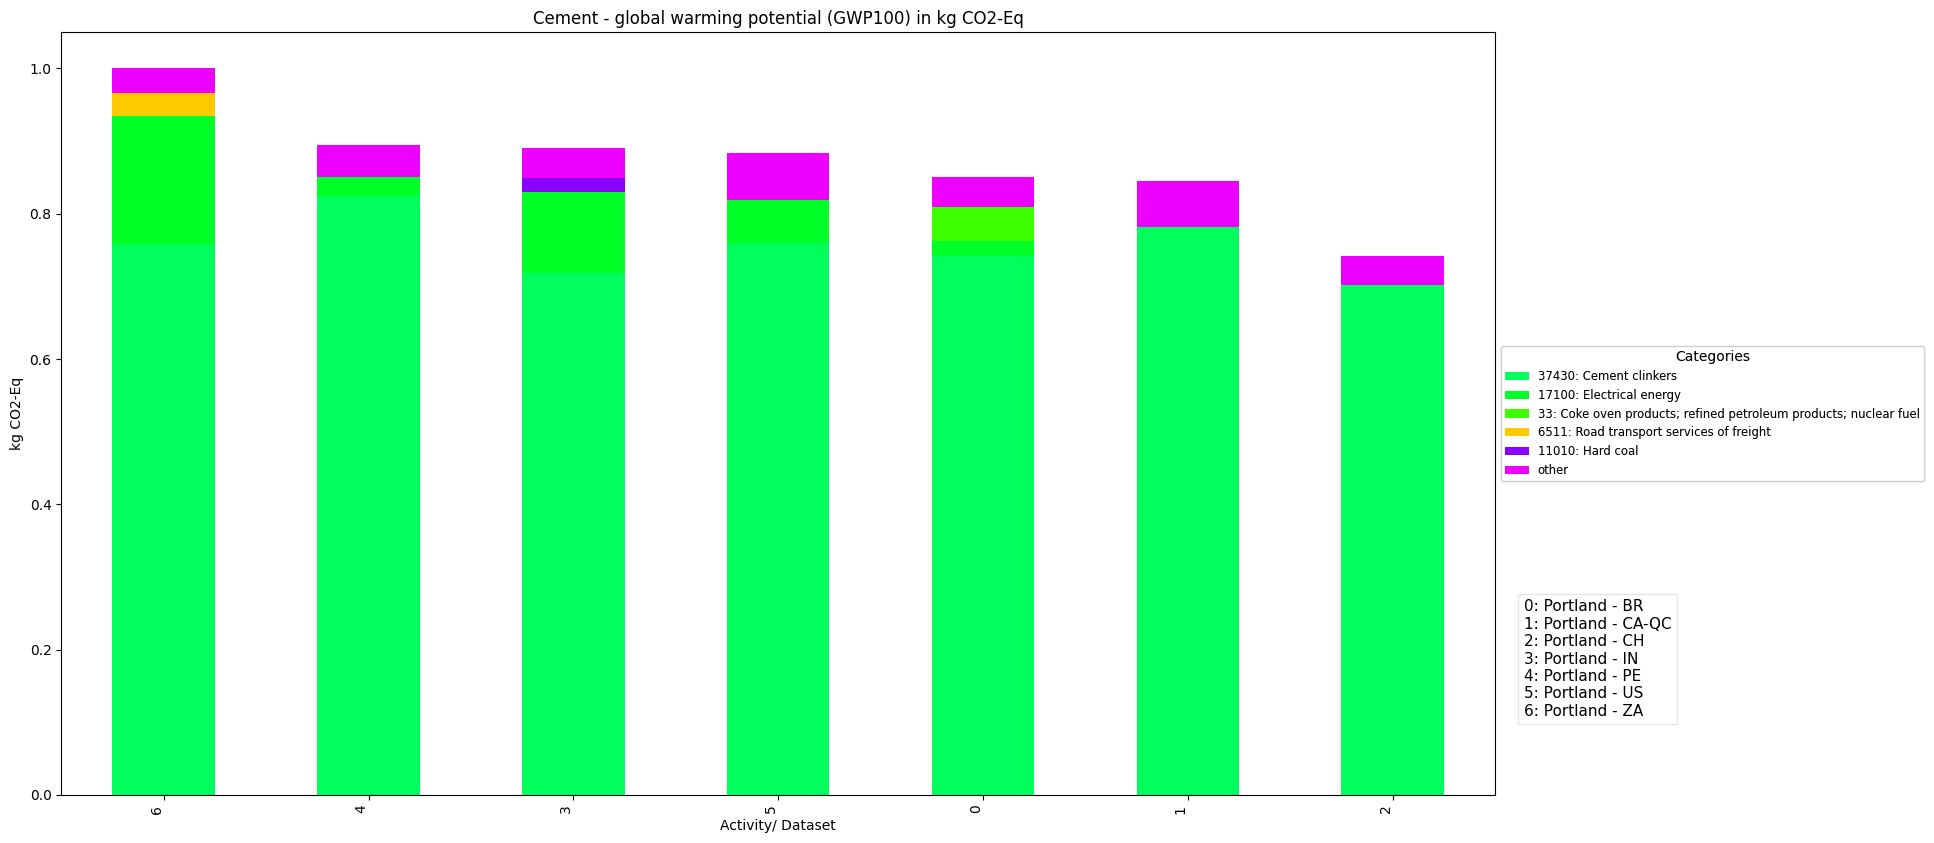

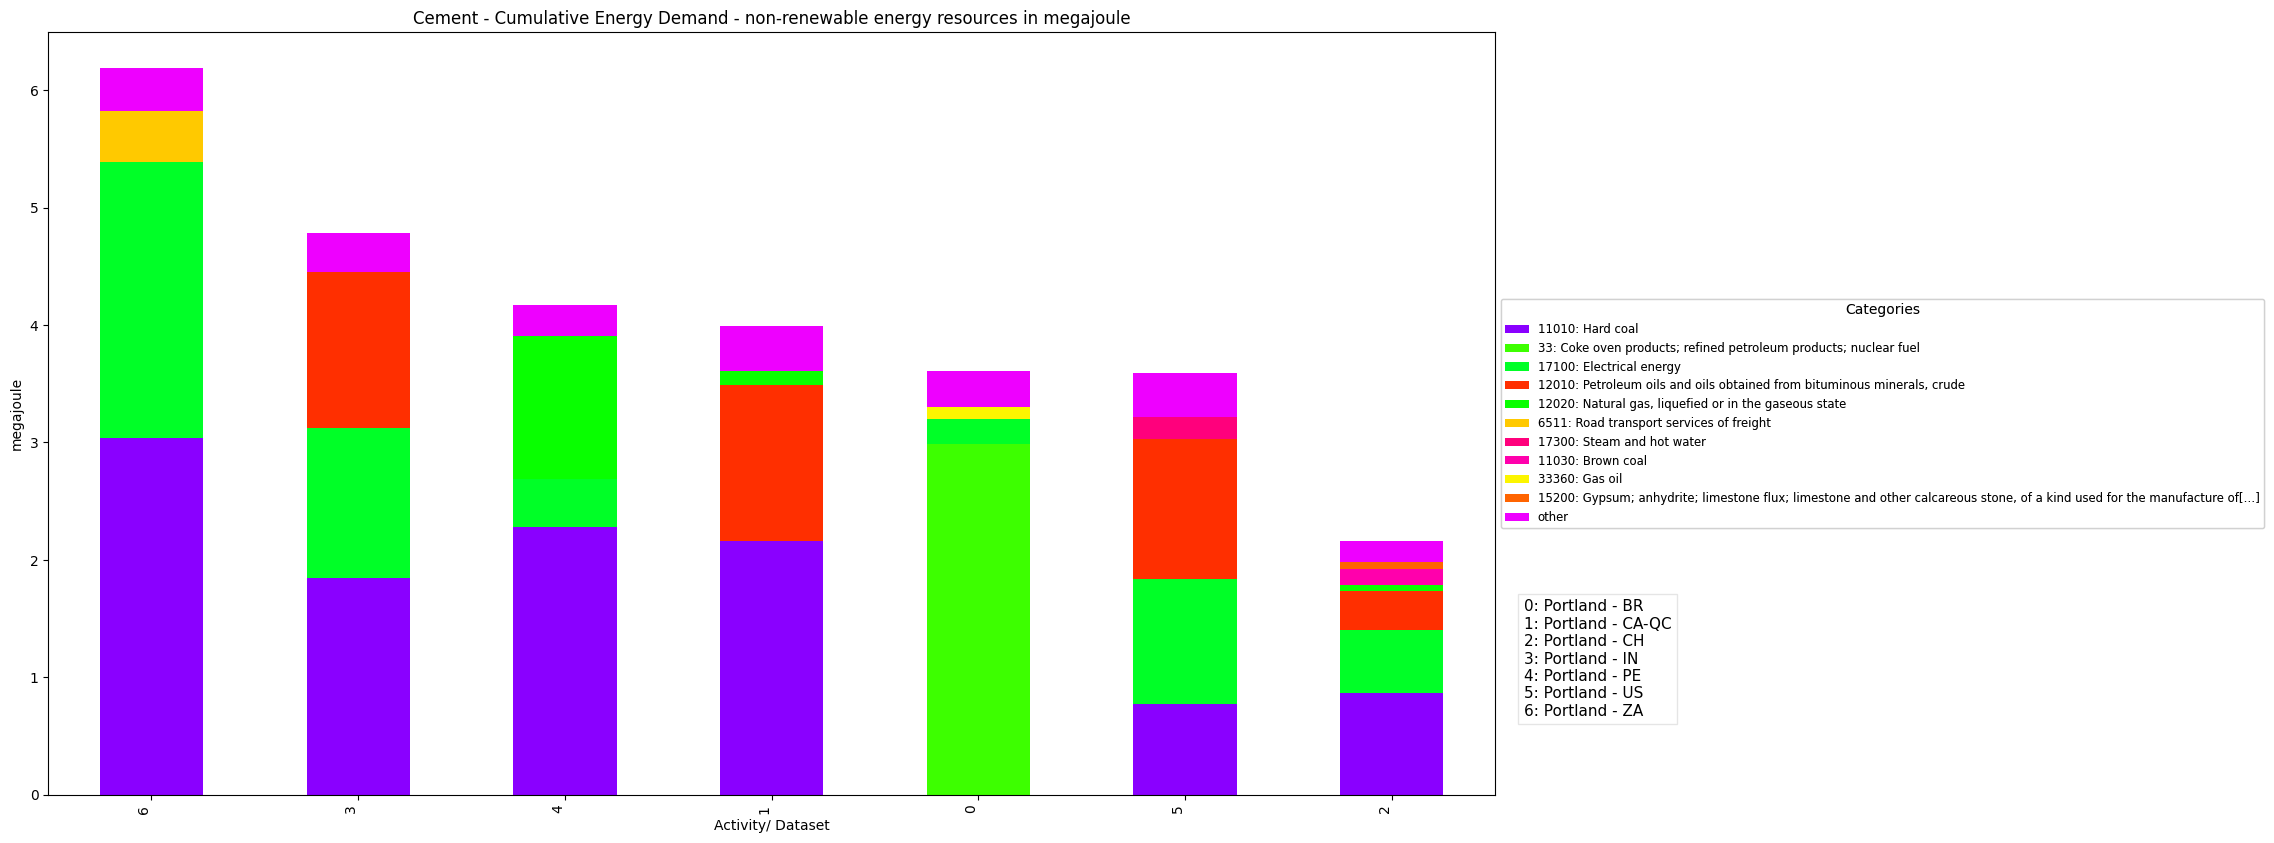

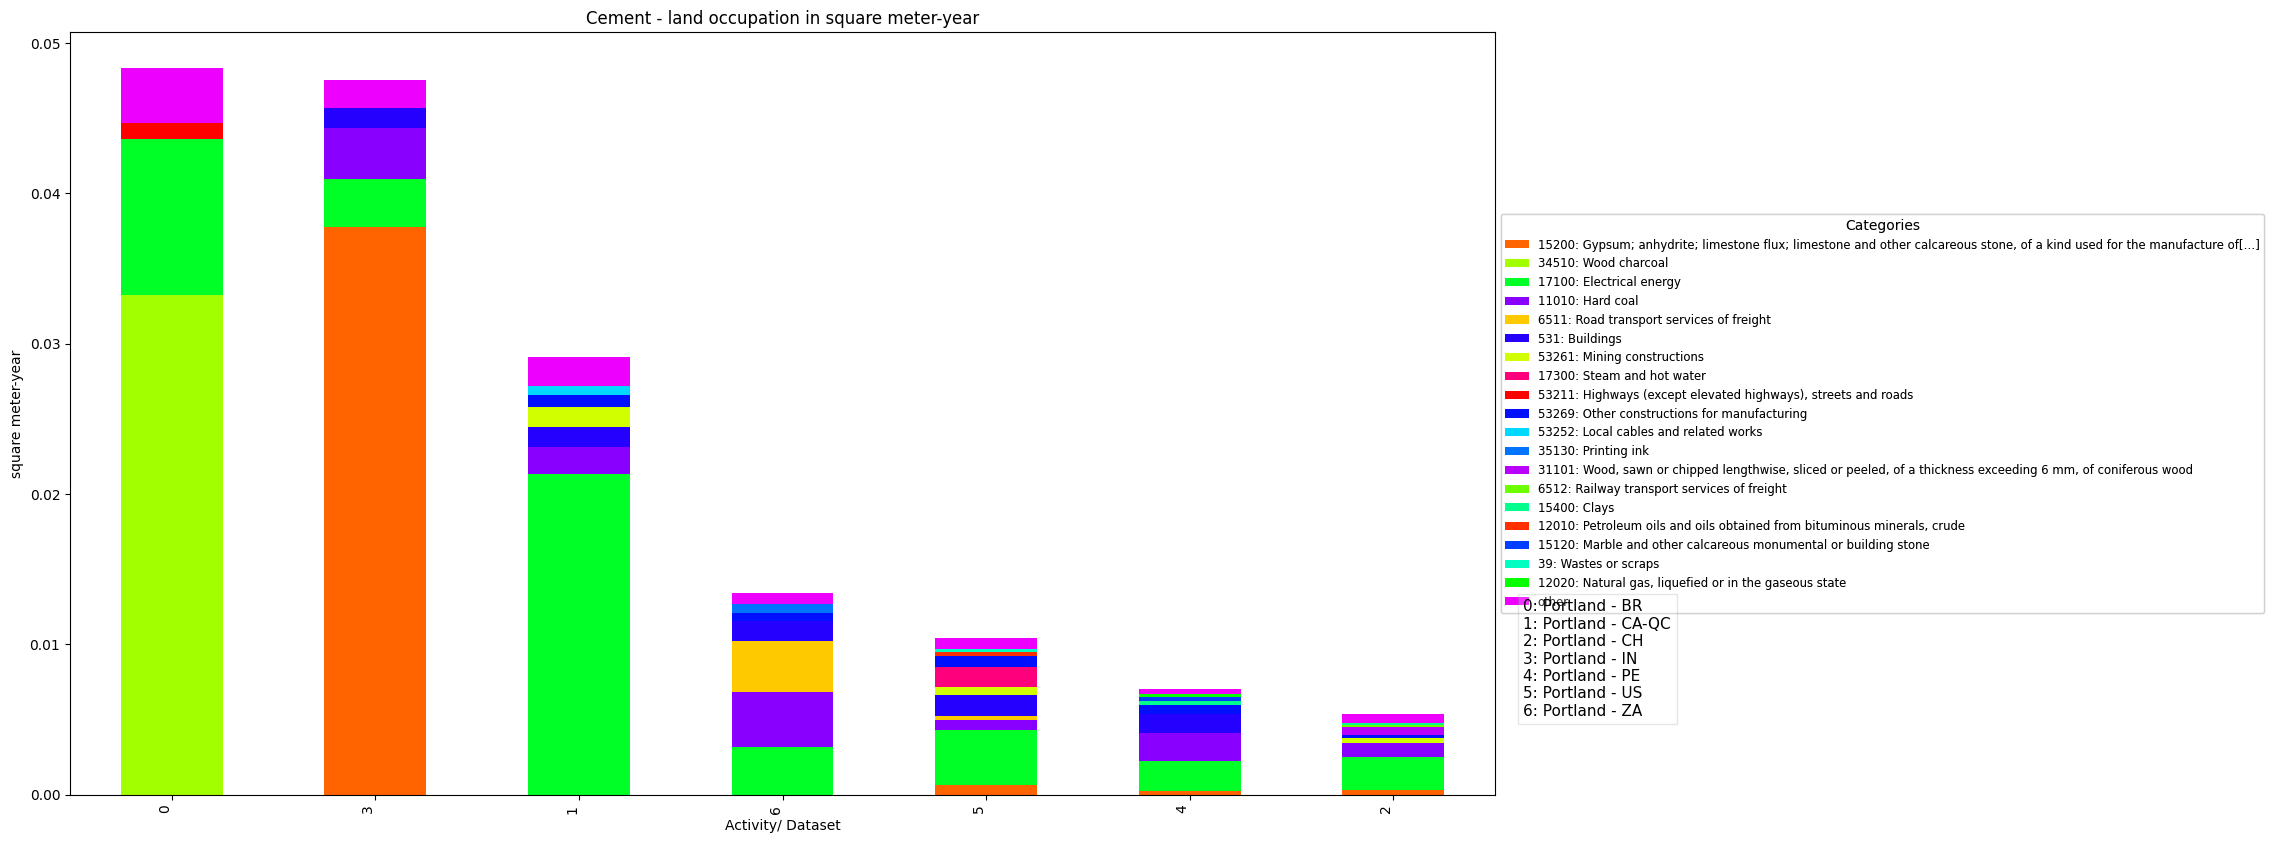

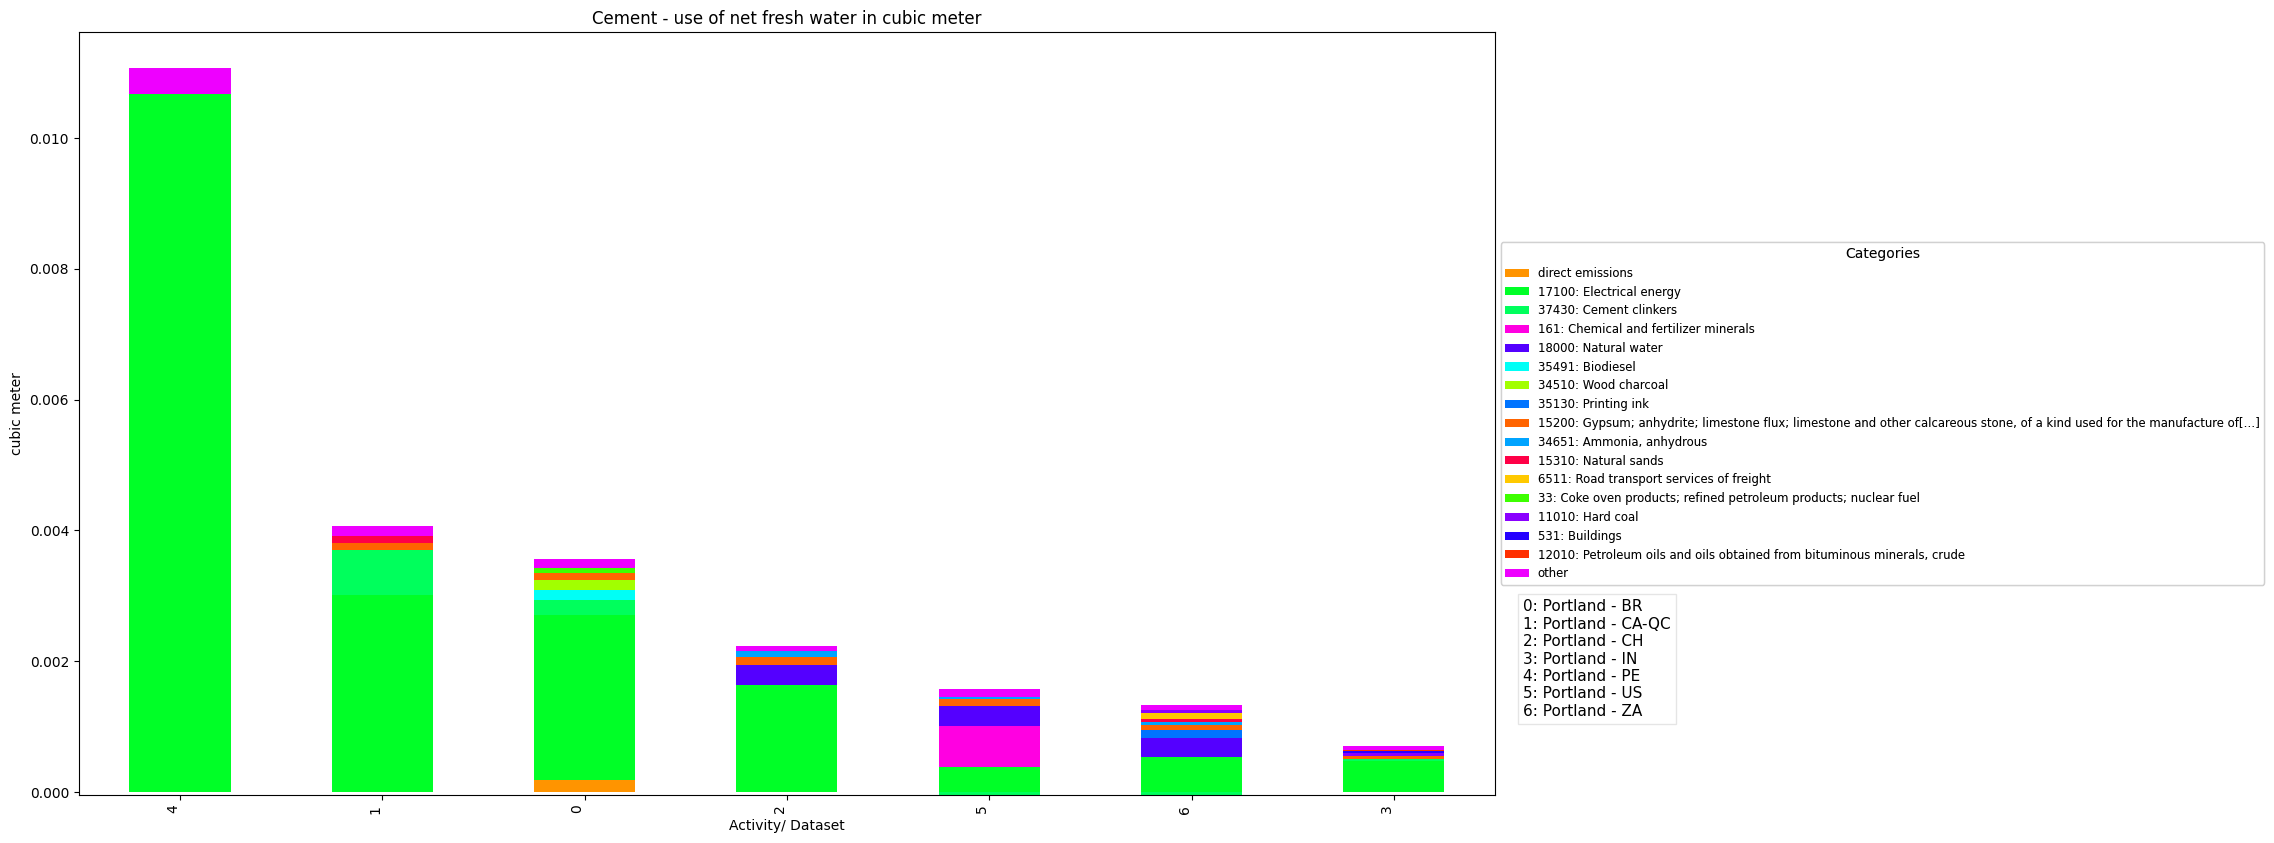

In [23]:
dopo.lvl21_plot_stacked_absolute(cement_sector_LCAs_w_other, 'Cement')

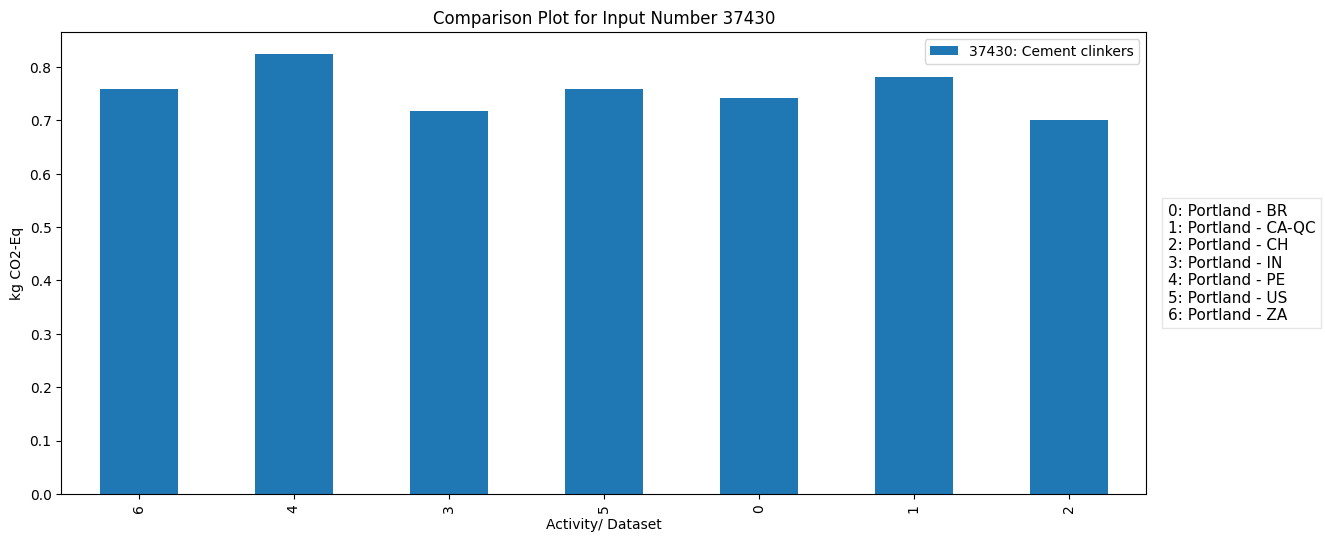

In [24]:
dopo.lvl22_plot_input_comparison_with_method(cement_sector_LCAs_w_other, 'cement_global_warming_potential_(gwp100)', '37430') 

In [25]:
dopo.lvl23_plot_input_comparison_plot_no_method(small_cement, input_type='list', input_number='37430') 

NameError: name '_get_cpc_inputs_of_activities' is not defined

In [28]:
small_cement_ei39=[x for x in dopo.generate_sets_from_filters(fp_yaml, database=ei39)['Cement'] 
                   if'Portland' in x['name'] 
                   and 'Slag' not in x['name'] 
                   and 'Pozzolana' not in x['name'] 
                   and 'Europe without Switzerland' not in x['location'] 
                   and 'RoW' not in x['location']]


In [30]:
dopo.lvl3_plot_relative_changes(small_cement_ei39, small_cement, method=method_dict['method_1']['object'].name )

NameError: name 'calculate_lca_ecoinvent_scores' is not defined